In [2]:
from astropy.io import fits
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import re
import os
from astroquery.simbad import Simbad

In [13]:
#new: find Hyperleda NGC Simbad types
ngc_numbers = []
folder_path = 'lc'
for filename in os.listdir(folder_path):
    if filename.startswith('lc_NGC') and filename.endswith('_cleaned'):
        ngc = filename[3:-8]
        try:
            customSimbad = Simbad()
            customSimbad.add_votable_fields('otype')
            customSimbad.add_votable_fields('dimensions')
            customSimbad.add_votable_fields('flux(I)')
            customSimbad.add_votable_fields('flux(R)')
            result = customSimbad.query_object(ngc)
            galtype = result['OTYPE'][0]
            flux_i, flux_r, diameter = 0, 0, 0
            try:
                flux_i = result['FLUX_I'][0]
            except KeyError:
                pass
            try:
                flux_r = result['FLUX_R'][0]
            except KeyError:
                pass
            try:
                majaxis = result['GALDIM_MAJAXIS']
                minaxis = result['GALDIM_MINAXIS']
                if (majaxis is None or not isinstance(majaxis[0], (int, float, np.float32))) and (minaxis is None or not isinstance(minaxis[0], (int, float, np.float32))):
                    pass
                elif (majaxis is None or not isinstance(majaxis[0], (int, float, np.float32))) and (minaxis is not None and isinstance(minaxis[0], (int, float, np.float32))):
                    diameter = minaxis[0]
                elif (majaxis is not None and isinstance(majaxis[0], (int, float, np.float32))) and (minaxis is None or not isinstance(minaxis[0], (int, float, np.float32))):
                    diameter = majaxis[0]
                else:
                    diameter = (majaxis[0] + minaxis[0]) / 2
            except KeyError:
                pass
        except TypeError:
            print(ngc,'not found')
            pass
        print(ngc, '\t', galtype, '\t', flux_i, '\t', flux_r, '\t', diameter)

NGC0007 	 EmissionG 	 13.9 	 13.23 	 1.5549999475479126
NGC0010 	 EmissionG 	 -- 	 11.79 	 1.1260000467300415
NGC0024 	 EmissionG 	 11.5 	 11.46 	 3.6649999618530273
NGC0025 	 BrightestCG 	 -- 	 12.42 	 0.7020000219345093
NGC0053 	 Seyfert2 	 -- 	 12.42 	 0.828000009059906
NGC0065 	 GtowardsGroup 	 -- 	 13.72 	 0.46299999952316284
NGC0066 	 Seyfert1 	 -- 	 13.27 	 0.6599999666213989
NGC0077 	 Galaxy 	 -- 	 14.66 	 0.30399999022483826
NGC0087 	 GtowardsGroup 	 -- 	 14.01 	 0.2994999885559082
NGC0088 	 GtowardsGroup 	 -- 	 14.21 	 0.265500009059906
NGC0089 	 GtowardsGroup 	 -- 	 12.98 	 0.5619999766349792
NGC0092 	 GtowardsCl 	 -- 	 12.4 	 0.6019999980926514
NGC0098 	 EmissionG 	 12.8 	 12.31 	 0.8600000143051147
NGC0101 	 EmissionG 	 13.0 	 12.31 	 0.715999960899353
NGC0115 	 LowSurfBrghtG 	 13.5 	 12.85 	 0.5329999923706055
NGC0119 	 Seyfert2 	 -- 	 12.59 	 0.6499999761581421
NGC0131 	 Seyfert2 	 -- 	 12.68 	 0.7335000038146973
NGC0134 	 GinPair 	 10.4 	 9.69 	 5.210000038146973
NGC014

C:\Users\Gumbledalf\Miniconda3\envs\elk\Lib\site-packages\astroquery\simbad\core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NGC  7763
  warnings.warn("Warning: The script line number %i raised "


NGC7764A 	 Seyfert1 	 -- 	 14.6 	 0.4675000011920929
NGC7764E not found
NGC7764E 	 Seyfert1 	 -- 	 14.6 	 0.4675000011920929


C:\Users\Gumbledalf\Miniconda3\envs\elk\Lib\site-packages\astroquery\simbad\core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : NGC  7764E
  warnings.warn("Warning: The script line number %i raised "


NGC7776 	 Galaxy 	 -- 	 13.66 	 0.5575000047683716
NGC7796 	 Seyfert1 	 -- 	 10.82 	 1.369499921798706
NGC7807 	 Seyfert2 	 -- 	 14.36 	 0.37299999594688416
NGC7812 	 Seyfert1 	 -- 	 12.93 	 0.5285000205039978
NGC7821 	 Galaxy 	 -- 	 13.16 	 0.6614999771118164
NGC7823 	 EmissionG 	 -- 	 12.24 	 0.653499960899353


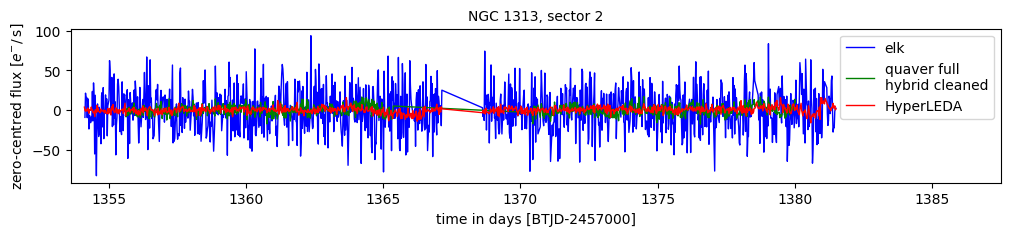

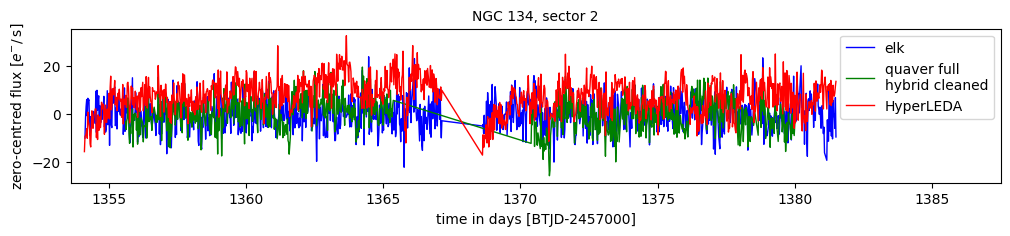

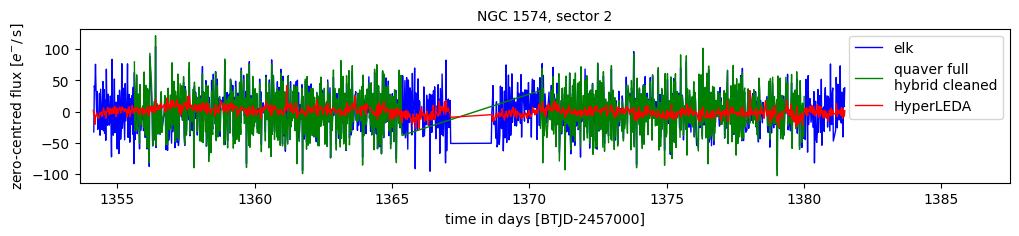

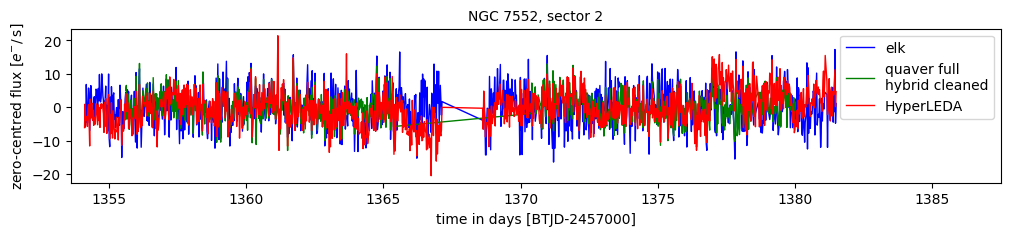

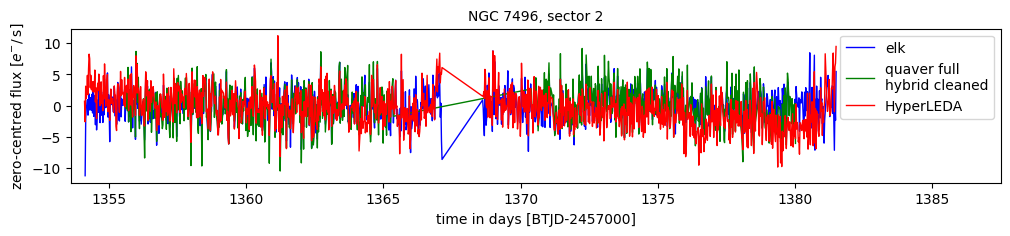

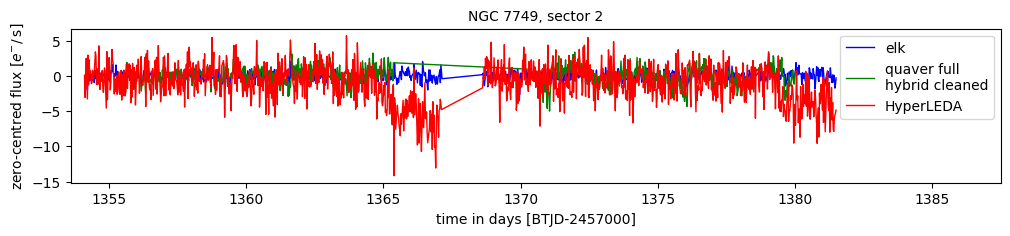

In [19]:
#plot Hyperleda vs elk vs quaver
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import re
import os

galaxies = ['NGC 1313', 'NGC 134', 'NGC 1574', 'NGC 7552', 'NGC 7496', 'NGC 7749'] #
for galaxy in galaxies:
    galaxy_sn = galaxy.replace(" ","")
    
    if not os.path.exists('lc/lc_'+galaxy_sn+'_cleaned.fits'):
        input_file = 'lc/lc_'+galaxy_sn+'_cleaned'
        output_file = 'modified_file'
        with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
            for line in infile:
                modified_line = ','.join(line.strip().split())
                outfile.write(modified_line + '\n')
        os.replace(output_file, input_file)
        data = np.genfromtxt(input_file, names=True, dtype=None, delimiter=',', skip_header=0)
        table_hdu = fits.BinTableHDU.from_columns(data)
        fits_file = input_file + ' fits.fits'
        table_hdu.writeto(fits_file, overwrite=True)
    
    lc2 = fits.open(fits_file)
    lc1 = fits.open('lc comparison/'+galaxy+'_lc_2.fits')
    lc3 = fits.open('lc comparison/'+galaxy_sn+'/'+galaxy_sn+'_sector2_full_hybrid_lc_cleaned.fits')
    data1 = lc1[1].data
    data2 = lc2[1].data
    data3 = lc3[1].data
    
    time1 = data1['time']
    flux1 = data1['flux']
    time2 = data2['BTJD']
    flux2 = data2['cts']
    time3 = data3['time']
    flux3 = data3['flux']
    meanflux3 = np.mean(flux3)
    newflux3 = (flux3 - meanflux3)
    meanflux = np.mean(flux1)
    newflux1 = (flux1 - meanflux)
    newflux2 = flux2 / 1425.6 #per second
    
    plt.figure(figsize=(12, 2))
    plt.plot(time1, newflux1, color='b', linewidth=1, label='elk')
    plt.plot(time3, newflux3, color='g', linewidth=1, label='quaver full \nhybrid cleaned')
    plt.plot(time2, newflux2, color='r', linewidth=1, label='HyperLEDA')
    plt.xlabel("time in days [BTJD-2457000]")
    plt.ylabel(r"zero-centred flux $[e^{-}/ \: \mathrm{s}]$")
    plt.xlim(min(time1[0],time2[0],time3[0])-0.5,max(time1[-1],time2[-1],time3[-1])+6)
    plt.title(galaxy+', sector 2', fontsize='10')
    plt.legend()
    plt.savefig('../figures/python plots/'+galaxy+' Hyperleda comparison')
    plt.show()
    """ppm = np.std(flux1) / meanflux * 1000000
    print("elk\tmean:",meanflux, ", std:",np.std(flux1),"=",ppm,"ppm")
    ppm3 = np.std(flux3) / meanflux3 * 1000000
    print("quaver\tmean:",meanflux3, ", std:",np.std(flux3),"=",ppm,"ppm")
    print("Hyperleda\tmean:",np.mean(newflux2),"\tstd:",np.std(flux2)/1425.6, "extrapolated from elk:",ppm*np.std(flux2)/np.std(flux1)/1425.6,"ppm")#"""

NGC 134
elk	mean: 49028.45405257107 , std: 6.570376816288464 = 134.0115029783182 ppm
quaver	mean: 31813.329777427727 , std: 6.6980863592477125 = 210.5433919086381 ppm
quaver uncleaned	mean: 31813.075041170236 , std: 6.844612497336827 = 215.15092421839176 ppm
Hyperleda	mean: 7.274522244268078 	std: 6.928457396469093 extrapolated from elk: 141.31502880021492 ppm	extrapolated from quaver: 217.78472875810033 ppm
NGC 1574
elk	mean: 59092.45099877195 , std: 34.701879836660495 = 587.247258323769 ppm
quaver	mean: 55617.91720686372 , std: 36.637337481100154 = 658.7326408652139 ppm
quaver uncleaned	mean: 55617.4906024214 , std: 36.65064278116212 = 658.9769222627688 ppm
Hyperleda	mean: 0.19884572396298608 	std: 7.2214151320646405 extrapolated from elk: 122.20537496768775 ppm	extrapolated from quaver: 129.83972602220095 ppm
NGC 7552
elk	mean: 31507.773517519334 , std: 5.57485423910312 = 176.93583572331195 ppm
quaver	mean: 19872.40898323861 , std: 4.336172017442075 = 218.20062283839974 ppm
quaver u

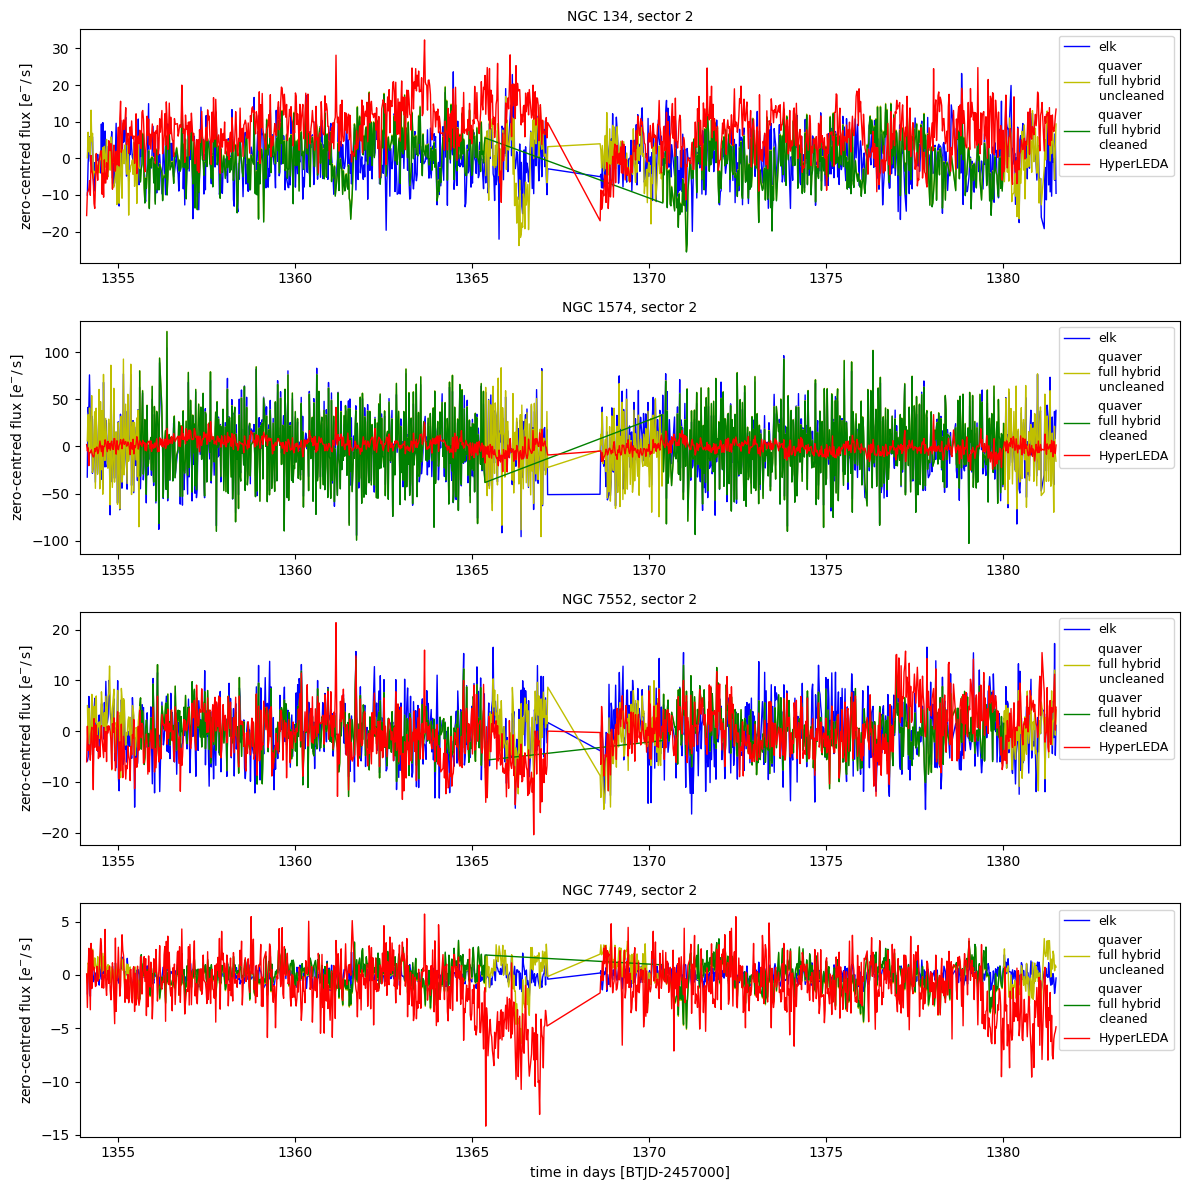

In [8]:
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import re
import os

galaxies = ['NGC 134', 'NGC 1574', 'NGC 7552', 'NGC 7749'] #'NGC 1313', 'NGC 7496', 
num_figures = len(galaxies)
fig_combined, axes = plt.subplots(num_figures, 1, figsize=(12, 12))
for i,galaxy in enumerate(galaxies):
    galaxy_sn = galaxy.replace(" ","")
    """if not os.path.exists('lc/lc_'+galaxy_sn+'_cleaned.fits'):
        input_file = 'lc/lc_'+galaxy_sn+'_cleaned'
        output_file = 'modified_file'
        with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
            for line in infile:
                modified_line = ','.join(line.strip().split())
                outfile.write(modified_line + '\n')
        os.replace(output_file, input_file)
        data = np.genfromtxt(input_file, names=True, dtype=None, delimiter=',', skip_header=0)
        table_hdu = fits.BinTableHDU.from_columns(data)
        fits_file = input_file + ' fits.fits'
        table_hdu.writeto(fits_file, overwrite=True)"""
    lc2 = fits.open('lc/lc_'+galaxy_sn+'_cleaned fits.fits')
    lc1 = fits.open('lc comparison/'+galaxy+'_lc_2.fits')
    lc3 = fits.open('lc comparison/'+galaxy_sn+'/'+galaxy_sn+'_sector2_full_hybrid_lc_cleaned.fits')
    #try:
    lc4 = fits.open('lc comparison/'+galaxy_sn+'/'+galaxy_sn+'_sector2_full_hybrid_lc.fits')
    """except FileNotFoundError:
        data = np.genfromtxt('lc comparison/'+galaxy_sn+'/'+galaxy_sn+'_sector2_full_hybrid_lc.dat', names=['time', 'flux', 'flux_err'], dtype=None)
        table = Table(data)
        table.write('lc comparison/'+galaxy_sn+'/'+galaxy_sn+'_sector2_full_hybrid_lc.fits', format='fits', overwrite=True)
        lc4 = fits.open('lc comparison/'+galaxy_sn+'/'+galaxy_sn+'_sector2_full_hybrid_lc.fits')"""
    data1 = lc1[1].data
    data2 = lc2[1].data
    data3 = lc3[1].data
    data4 = lc4[1].data
    time1 = data1['time']
    flux1 = data1['flux']
    time2 = data2['BTJD']
    flux2 = data2['cts']
    time3 = data3['time']
    flux3 = data3['flux']
    time4 = data4['time']
    flux4 = data4['flux']
    meanflux3 = np.mean(flux3)
    newflux3 = (flux3 - meanflux3)
    meanflux4 = np.mean(flux4)
    newflux4 = (flux4 - meanflux4)
    meanflux = np.mean(flux1)
    newflux1 = (flux1 - meanflux)
    newflux2 = flux2 / 1425.6 #per second
    ax = axes[i]
    ax.plot(time1, newflux1, color='b', linewidth=1, label='elk')
    ax.plot(time4, newflux4, color='y', linewidth=1, label='quaver \nfull hybrid\nuncleaned')
    ax.plot(time3, newflux3, color='g', linewidth=1, label='quaver \nfull hybrid\ncleaned')
    ax.plot(time2, newflux2, color='r', linewidth=1, label='HyperLEDA')
    if i == num_figures - 1:
        ax.set_xlabel("time in days [BTJD-2457000]")
    ax.set_ylabel(r"zero-centred flux $[e^{-}/ \: \mathrm{s}]$")
    ax.set_xlim(min(time1[0],time2[0],time3[0])-0.2,max(time1[-1],time2[-1],time3[-1])+3.5)
    ax.set_title(galaxy+', sector 2', fontsize='10')
    ax.legend(fontsize='9')
    #plt.savefig('../figures/python plots/'+galaxy+' Hyperleda comparison')
    #plt.show()
    
    ppm = np.std(flux1) / meanflux * 1000000
    print(galaxy)
    print("elk\tmean:",meanflux, ", std:",np.std(flux1),"=",ppm,"ppm")
    ppm3 = np.std(flux3) / meanflux3 * 1000000
    ppm4 = np.std(flux4) / meanflux4 * 1000000
    print("quaver\tmean:",meanflux3, ", std:",np.std(flux3),"=",ppm3,"ppm")
    print("quaver uncleaned\tmean:",meanflux4, ", std:",np.std(flux4),"=",ppm4,"ppm")
    print("Hyperleda\tmean:",np.mean(newflux2),"\tstd:",np.std(flux2)/1425.6, "extrapolated from elk:",ppm*np.std(flux2)/np.std(flux1)/1425.6,"ppm\textrapolated from quaver:",ppm3*np.std(flux2)/np.std(flux3)/1425.6,"ppm")

fig_combined.tight_layout()
fig_combined.savefig('../figures/python plots/Hyperleda comparison uncleaned.png')
plt.show()

In [6]:
# Define the input text file and FITS file
input_file = 'lc/lc_NGC0134_cleaned'
output_file = 'modified_file'

# Read the text file and remove the first five spaces, then replace multiple spaces with commas
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        # Remove the first five spaces, then replace multiple spaces with commas
        modified_line = ','.join(line.strip().split())
        # Write the modified line to the output file
        outfile.write(modified_line + '\n')
# Rename the output file to the original file name if needed
os.replace(output_file, input_file)

# Read the data from the text file into a NumPy array with tab as the delimiter
data = np.genfromtxt(input_file, names=True, dtype=None, delimiter=',', skip_header=0)
# Create a FITS table extension
table_hdu = fits.BinTableHDU.from_columns(data)
# Specify the output FITS file name
fits_file = 'lc/lc_NGC0134_cleaned fits.fits'
# Write the FITS file
table_hdu.writeto(fits_file, overwrite=True)

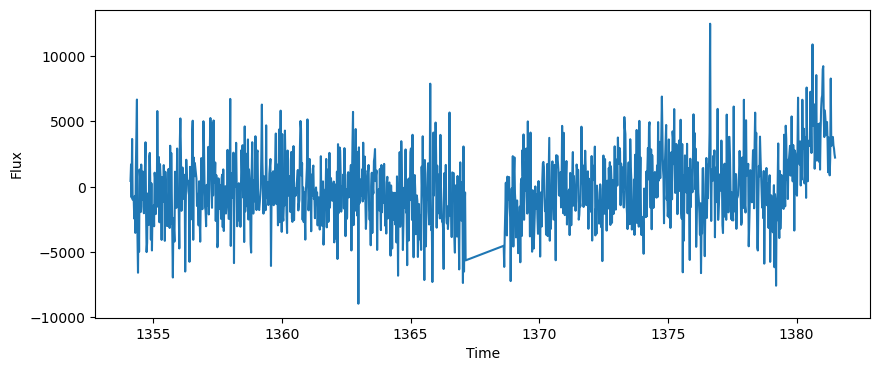

In [9]:
#general
input_file = 'lc/lc_ESO114-014_cleaned'
output_file = 'modified_file'
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        modified_line = ','.join(line.strip().split())
        outfile.write(modified_line + '\n')
os.replace(output_file, input_file)
data = np.genfromtxt(input_file, names=True, dtype=None, delimiter=',', skip_header=0)
table_hdu = fits.BinTableHDU.from_columns(data)
fits_file = 'lc/lc_ESO114-014_cleaned.fits'
table_hdu.writeto(fits_file, overwrite=True)
with fits.open(fits_file, mode='readonly') as hdulist:
    data = hdulist[1].data
time_column = data['BTJD'].astype(np.float64)
flux_column = data['cts'].astype(np.float64)
plt.figure(figsize=(10, 4))
plt.plot(time_column, flux_column)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.savefig('ESO114-014 hyperleda')
plt.show()

In [5]:
fits_file = "lc_ESO346-034_cleaned 3.fits"
with fits.open(fits_file, mode='readonly') as hdulist:
    data = hdulist[1].data
    
time_column = data['135411875'].astype(np.float64)
flux_column = data['53606083'].astype(np.float64)

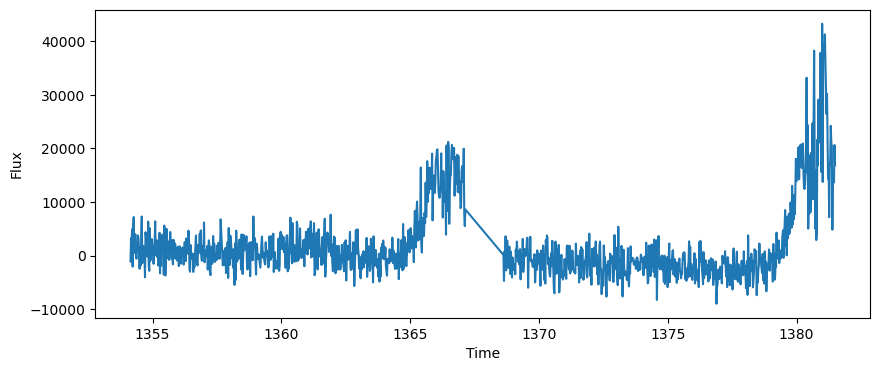

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(time_column, flux_column)
plt.xlabel('Time')
plt.ylabel('Flux')
#plt.title('FITS File Plot')
#plt.grid(True)
plt.savefig('ESO346-034 c1ccd1')
plt.show()

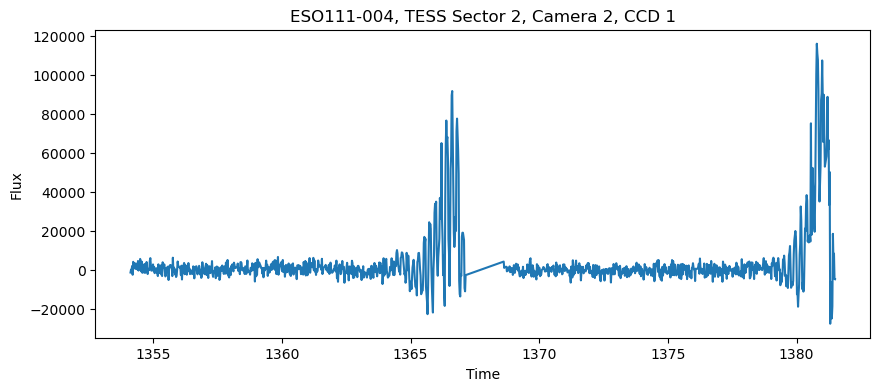

In [21]:
fits_file = "lc_ESO111-004_cleaned c2ccd1.fits"
with fits.open(fits_file, mode='readonly') as hdulist:
    data = hdulist[1].data
    
time_column = data['BTJD'].astype(np.float64)
flux_column = data['cts'].astype(np.float64)

plt.figure(figsize=(10, 4))
plt.plot(time_column, flux_column)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('ESO111-004, TESS Sector 2, Camera 2, CCD 1')
#plt.grid(True)
plt.savefig('s2c2d1 ESO111-004.png')
plt.show()

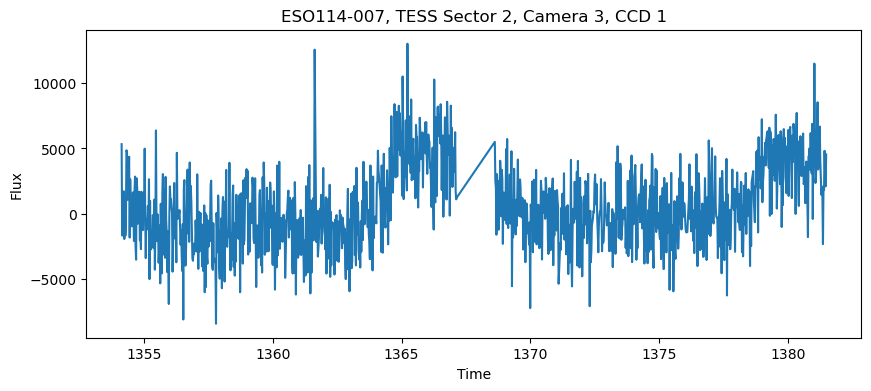

In [19]:
fits_file = "lc_ESO114-007_cleaned c3ccd1.fits"
with fits.open(fits_file, mode='readonly') as hdulist:
    data = hdulist[1].data
    
time_column = data['BTJD'].astype(np.float64)
flux_column = data['cts'].astype(np.float64)

plt.figure(figsize=(10, 4))
plt.plot(time_column, flux_column)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('ESO114-007, TESS Sector 2, Camera 3, CCD 1')
#plt.grid(True)
plt.savefig('s2c3d1 ESO114-007.png')
plt.show()

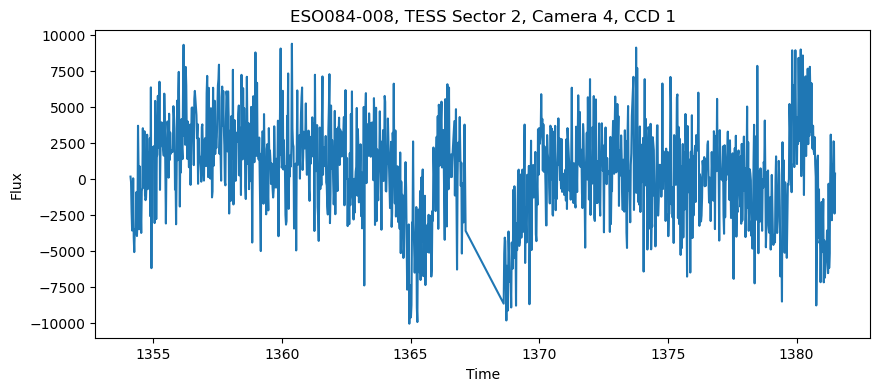

In [18]:
fits_file = "lc_ESO084-008_cleaned c4ccd1.fits"
with fits.open(fits_file, mode='readonly') as hdulist:
    data = hdulist[1].data
    
time_column = data['BTJD'].astype(np.float64)
flux_column = data['cts'].astype(np.float64)

plt.figure(figsize=(10, 4))
plt.plot(time_column, flux_column)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('ESO084-008, TESS Sector 2, Camera 4, CCD 1')
#plt.grid(True)
plt.savefig('s2c4d1 ESO084-008.png')
plt.show()

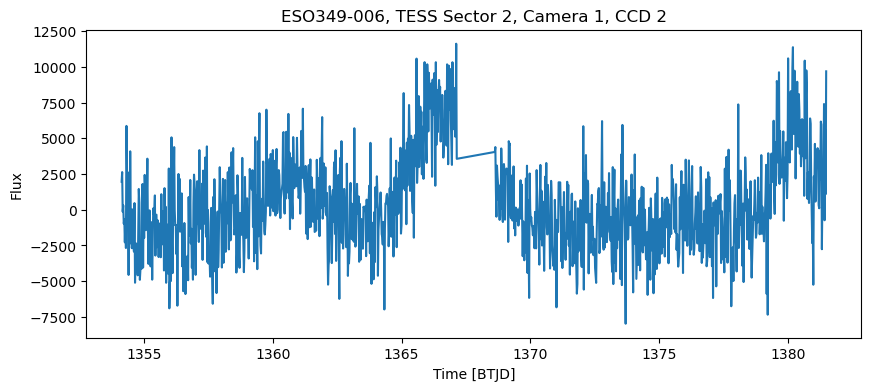

In [23]:
fits_file = "lc_ESO349-006_cleaned c1ccd2.fits"
with fits.open(fits_file, mode='readonly') as hdulist:
    data = hdulist[1].data
    
time_column = data['BTJD'].astype(np.float64)
flux_column = data['cts'].astype(np.float64)

plt.figure(figsize=(10, 4))
plt.plot(time_column, flux_column)
plt.xlabel('Time [BTJD]')
plt.ylabel('Flux')
plt.title('ESO349-006, TESS Sector 2, Camera 1, CCD 2')
#plt.grid(True)
plt.savefig('s2c1d2 ESO349-006.png')
plt.show()